In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

clm_filename = 'CLM5_experiment_1_2010.nc'

In [2]:
spmip_ds = xr.open_dataset(clm_filename)
spmip_ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 360, levgrnd: 25, levsoi: 20, lon: 720, time: 365)
Coordinates:
  * time       (time) object 2010-01-02 00:00:00 ... 2011-01-01 00:00:00
  * lon        (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat        (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * levgrnd    (levgrnd) float32 0.01 0.04 0.09 ... 19.48313 28.870724 41.998436
Dimensions without coordinates: bnds, levsoi
Data variables:
    time_bnds  (time, bnds) object ...
    mcdate     (time) float32 ...
    mcsec      (time) float32 ...
    mdcur      (time) float32 ...
    mscur      (time) float32 ...
    nstep      (time) float32 ...
    area       (lat, lon) float32 ...
    landfrac   (lat, lon) float32 ...
    landmask   (lat, lon) float32 ...
    pftmask    (lat, lon) float32 ...
    nbedrock   (lat, lon) float32 ...
    ZSOI       (levgrnd, lat, lon) float32 ...
    DZSOI      (levgrnd, lat, lon) float32 ...
    rss        (time, lat, lon) float32 ...
    rls        (time, lat, lon) float32 ...
    hfls       (time, lat, lon) float32 ...
    hfss       (time, lat, lon) float32 ...
    hfdss      (time, lat, lon) float32 ...
    ts         (time, lat, lon) float32 ...
    albsrfc    (time, lat, lon) float32 ...
    snc        (time, lat, lon) float32 ...
    tsl        (time, levgrnd, lat, lon) float32 ...
    et         (time, lat, lon) float32 ...
    ec         (time, lat, lon) float32 ...
    tran       (time, lat, lon) float32 ...
    es         (time, lat, lon) float32 ...
    mrro       (time, lat, lon) float32 ...
    mrrob      (time, lat, lon) float32 ...
    snm        (time, lat, lon) float32 ...
    cw         (time, lat, lon) float32 ...
    snw        (time, lat, lon) float32 ...
    snwc       (time, lat, lon) float32 ...
    mrlsl      (time, levsoi, lat, lon) float32 ...
    tws        (time, lat, lon) float32 ...
    mrfsofr    (time, levsoi, lat, lon) float32 ...
    snd        (time, lat, lon) float32 ...
    preshead   (time, levgrnd, lat, lon) float32 ...
    hydcnd     (time, levgrnd, lat, lon) float32 ...
    thrmcnd    (time, levsoi, lat, lon) float32 ...
    heatcap    (time, levsoi, lat, lon) float32 ...
    lai        (time, lat, lon) float32 ...
Attributes:
    CDI:                                  Climate Data Interface version 1.9....
    history:                              Fri Aug 24 10:12:57 2018: cdo -f nc...
    source:                               Community Land Model CLM5.0
    Conventions:                          CF-1.0
    time_period_freq:                     day_1
    PFT_physiological_constants_dataset:  clm5_params.c171117.nc
    Initial_conditions_dataset:           I2000CLM50_exp1_spin.clm2.r.2005-01...
    Surface_dataset:                      surfdata_360x720cru_16pfts_simyr200...
    case_id:                              I2000CLM50_exp1
    version:                              release-clm5.0.03
    username:                             oleson
    hostname:                             cheyenne
    comment:                              NOTE: None of the variables are wei...
    title:                                CLM History file information
    CDO:                                  Climate Data Operators version 1.9....

In [3]:
et = spmip_ds.hfls.values
et.shape

(365, 360, 720)

In [4]:
et_ann_mm = np.sum((et / 28.94),0)
et_ann_mm.shape

(360, 720)

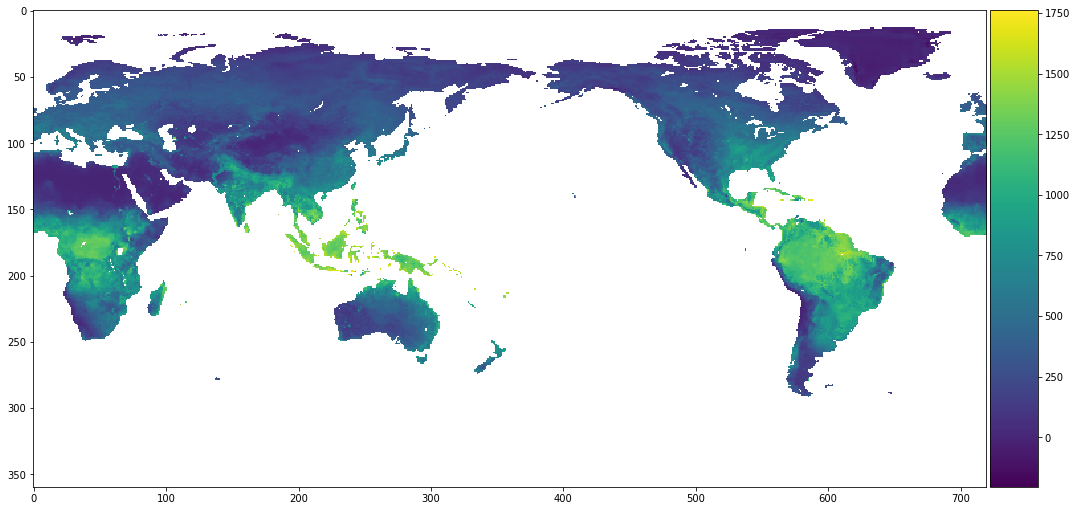

In [5]:
lon = spmip_ds.lon.values
lat = spmip_ds.lat.values

fig = plt.figure(figsize=(18,16))
ax = plt.gca()
im = ax.imshow(np.flipud(et_ann_mm))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)


In [20]:
et_mon_mm = spmip_ds['hfls'].groupby('time.month').sum() / 28.94
et_mon_mm

<xarray.DataArray 'hfls' (month: 12, lat: 360, lon: 720)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

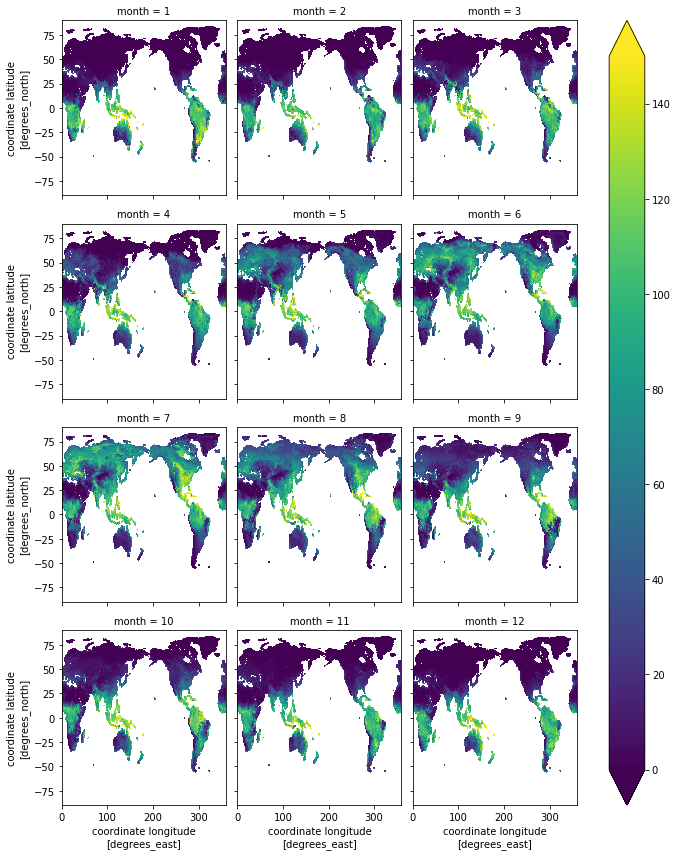

In [45]:
et_mon_mm = et_mon_mm*spmip_ds['landmask']
et_mon_mm.plot(x='lon', y='lat', col='month', col_wrap=3, cmap='viridis', vmin = 0.0, vmax = 150.0)